# Atelier 6- Traitement des données avec **R**

Bienvenue à cet atelier sur la manipulation et le nettoyage de données avec R.

Cet atelier a été développé à partir des ateliers sur la manipulation de données de [Software Carpentry](https://swcarpentry.github.io/r-novice-gapminder/13-dplyr/index.html) (liens supplémentaires à la fin du document). Il fait suite à l'atelier d'introduction présenté par **Francis Banville**. D'autres ressources sont également disponibles au [repo GitHub suivant](https://github.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R).

### Auteur

Gabriel Dansereau (il/lui), étudiant au doctorat en sciences biologiques à l'Université de Montréal

📧 gabriel.dansereau@umontreal.ca 

19 janvier 2022

# Introduction

## Objectif

L'objectif de cet atelier est de vous familiariser avec la manipulation et au nettoyage de données avec _R_ pour que vous puissez réaliser ces opérations par vous-même sur vos propres jeux de données. Nous reverrons des fonctions qui vous ont déjà été présentées, mais de manière un peu plus exhaustive afin de vous montrer différentes possibilités de manipulation.

## Contenu

1. Opérations de base pour manipuler les données
2. Nettoyage d'un jeu de données
3. Réorganisation d'un jeu de données

## Ressources utiles avant de commencer

- [Cheat sheet dplyr](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf)
- [Cheat sheet tidyr](https://raw.githubusercontent.com/rstudio/cheatsheets/main/tidyr.pdf)

## Préparation du jeu de données

In [23]:
# Charger le package nécessaire pour réaliser les manipulations
if (!require(tidyverse)) {
  installed.packages("tidyverse")
}
library(tidyverse)

In [24]:
# Charger le jeu de données gapminder
gapminder_url <- "https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder_data.csv"
dir.create("data")
download.file(gapminder_url, destfile = "data/gapminder_data.csv")
gapminder <- read_csv("data/gapminder_data.csv")

Warning message in dir.create("data"):
“'data' already exists”

── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  year = col_double(),
  pop = col_double(),
  continent = col_character(),
  lifeExp = col_double(),
  gdpPercap = col_double()
)




In [25]:
# Visualiser le jeu de données complet
gapminder

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134
Afghanistan,1982,12881816,Asia,39.854,978.0114
Afghanistan,1987,13867957,Asia,40.822,852.3959
Afghanistan,1992,16317921,Asia,41.674,649.3414


In [26]:
# Pour visualiser les premières lignes seulement (6 lignes par défaut)
head(gapminder)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [27]:
# Google Colab présente les tibbles différement des consoles R normales
# Seul l'aspect visuel est différent. Le contenu est identique pour R
# Pour les voir de la même façon, on peut utiliser `print()`
print(gapminder)

# Pour voir toutes les lignes
# print(gapminder, n = Inf)

# A tibble: 1,704 × 6
   country      year      pop continent lifeExp gdpPercap
   <chr>       <dbl>    <dbl> <chr>       <dbl>     <dbl>
 1 Afghanistan  1952  8425333 Asia         28.8      779.
 2 Afghanistan  1957  9240934 Asia         30.3      821.
 3 Afghanistan  1962 10267083 Asia         32.0      853.
 4 Afghanistan  1967 11537966 Asia         34.0      836.
 5 Afghanistan  1972 13079460 Asia         36.1      740.
 6 Afghanistan  1977 14880372 Asia         38.4      786.
 7 Afghanistan  1982 12881816 Asia         39.9      978.
 8 Afghanistan  1987 13867957 Asia         40.8      852.
 9 Afghanistan  1992 16317921 Asia         41.7      649.
10 Afghanistan  1997 22227415 Asia         41.8      635.
# … with 1,694 more rows


In [28]:
# Une autre façon de visualiser le contenu des colonnes
glimpse(gapminder)

Rows: 1,704
Columns: 6
$ country   <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ year      <dbl> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ pop       <dbl> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ continent <chr> "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asi…
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


In [29]:
# Regardons quelques détails sur le jeu de données
summary(gapminder)

   country               year           pop             continent        
 Length:1704        Min.   :1952   Min.   :6.001e+04   Length:1704       
 Class :character   1st Qu.:1966   1st Qu.:2.794e+06   Class :character  
 Mode  :character   Median :1980   Median :7.024e+06   Mode  :character  
                    Mean   :1980   Mean   :2.960e+07                     
                    3rd Qu.:1993   3rd Qu.:1.959e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
    lifeExp        gdpPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  

# 1.0 Les opérations de base pour manipuler les données

Nous verrons dans cet atelier les fonctions `tidyverse`, un ensemble de packages qui rendent la manipulation de données et le nettoyage très efficace, en particulier `dplyr` et `tidyr`. Cela dit, il est souvent possible de réaliser les mêmes opérations avec les fonctions de base de R (_base-R_). J'ai donc mis quelques exemples afin de comparer. 

Le package `dplyr` est le plus important pour la manipulation de données. Il comprend 5 opérations de base, que nous survolerons dans cette section.

1. `select`: sélection de colonnes
2. `filter`: sélections de rangées
3. `group_by`: regroupement par catégories
4. `summarize`: réaliser des opérations sur les groupes
5. `mutate`: ajout de colonnes

## 1.1 Sélection de colonnes avec `select`

_Note: J'utilise la fonction `head()` simplement pour éviter d'afficher trop de rangées à la fois. La fonction n'est pas nécessaire pour la manipulation de données en soi._

In [30]:
# Sélectionner certaines colonnes seulement
gapminder_selection <- select(gapminder, year, country, gdpPercap)
head(gapminder_selection)

year,country,gdpPercap
<dbl>,<chr>,<dbl>
1952,Afghanistan,779.4453
1957,Afghanistan,820.8530
1962,Afghanistan,853.1007
1967,Afghanistan,836.1971
1972,Afghanistan,739.9811
1977,Afghanistan,786.1134


In [31]:
# La même opération, mais en utilisant `%>%` (pipe, ou tuyau)
# Le pipe se combine bien avec toutes les fonctions où le jeu de données est le 
# premier argument, comme `head()`
gapminder %>%
  select(year, country, gdpPercap) %>%
  head()

year,country,gdpPercap
<dbl>,<chr>,<dbl>
1952,Afghanistan,779.4453
1957,Afghanistan,820.8530
1962,Afghanistan,853.1007
1967,Afghanistan,836.1971
1972,Afghanistan,739.9811
1977,Afghanistan,786.1134


In [32]:
# Remarquez que l'ordre de sélection détermine l'ordre de présentation des colonnes
gapminder %>%
  select(country, year, gdpPercap) %>%
  head()

country,year,gdpPercap
<chr>,<dbl>,<dbl>
Afghanistan,1952,779.4453
Afghanistan,1957,820.8530
Afghanistan,1962,853.1007
Afghanistan,1967,836.1971
Afghanistan,1972,739.9811
Afghanistan,1977,786.1134


In [33]:
# Retirer une colonne donnée
gapminder %>%
  select(-lifeExp, -pop) %>%
  head()

country,year,continent,gdpPercap
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1952,Asia,779.4453
Afghanistan,1957,Asia,820.8530
Afghanistan,1962,Asia,853.1007
Afghanistan,1967,Asia,836.1971
Afghanistan,1972,Asia,739.9811
Afghanistan,1977,Asia,786.1134


## 1.2 Sélection de rangées avec `filter`

In [34]:
# Sélectionner les rangées appartenant à une seule catégorie
gapminder %>%
  filter(continent == "Europe") %>%
  select(year, country, gdpPercap) %>%
  head()

year,country,gdpPercap
<dbl>,<chr>,<dbl>
1952,Albania,1601.056
1957,Albania,1942.284
1962,Albania,2312.889
1967,Albania,2760.197
1972,Albania,3313.422
1977,Albania,3533.004


Remarquez que l'ordre des opérations n'est pas interchangeable dans ce cas-ci, puisqu'on retire la colonne `continent`.

In [35]:
# Cette opération est encore réalisable avec base-R (deux façons)
head(gapminder[gapminder$continent == "Europe", c("year", "country", "gdpPercap")])
head(subset(gapminder, continent == "Europe", select = c("year", "country", "gdpPercap")))

year,country,gdpPercap
<dbl>,<chr>,<dbl>
1952,Albania,1601.056
1957,Albania,1942.284
1962,Albania,2312.889
1967,Albania,2760.197
1972,Albania,3313.422
1977,Albania,3533.004


year,country,gdpPercap
<dbl>,<chr>,<dbl>
1952,Albania,1601.056
1957,Albania,1942.284
1962,Albania,2312.889
1967,Albania,2760.197
1972,Albania,3313.422
1977,Albania,3533.004


In [36]:
# Sélectionner les rangées appartenant à deux catégories
gapminder %>% 
  filter(continent %in% c("Europe", "Africa")) %>%
  head()

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Albania,1952,1282697,Europe,55.23,1601.056
Albania,1957,1476505,Europe,59.28,1942.284
Albania,1962,1728137,Europe,64.82,2312.889
Albania,1967,1984060,Europe,66.22,2760.197
Albania,1972,2263554,Europe,67.69,3313.422
Albania,1977,2509048,Europe,68.93,3533.004


In [37]:
# Filter les rangées selon deux critères différents
gapminder %>%
  filter(continent == "Europe", year >= 2007) %>%
  head()

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Albania,2007,3600523,Europe,76.423,5937.030
Austria,2007,8199783,Europe,79.829,36126.493
Belgium,2007,10392226,Europe,79.441,33692.605
Bosnia and Herzegovina,2007,4552198,Europe,74.852,7446.299
Bulgaria,2007,7322858,Europe,73.005,10680.793
Croatia,2007,4493312,Europe,75.748,14619.223


In [38]:
# Filter les rangées à partir d'une étendue de valeurs
gapminder %>%
  filter(continent == "Europe", between(year, 2000, 2010)) %>%
  head()

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Albania,2002,3508512,Europe,75.651,4604.212
Albania,2007,3600523,Europe,76.423,5937.030
Austria,2002,8148312,Europe,78.980,32417.608
Austria,2007,8199783,Europe,79.829,36126.493
Belgium,2002,10311970,Europe,78.320,30485.884
Belgium,2007,10392226,Europe,79.441,33692.605


## Défi 1

Écrivez une commande qui produit un data frame (un `tibble`) avec les valeurs pour l'**Afrique seulement** et qui ne montre que le contenu des colonnes `lifeExp`, `country` et `year`. Combien de rangées le data frame contient-il?

In [39]:
# Solution
gapminder %>%
  filter(continent == "Africa") %>%
  select(lifeExp, country, year)


lifeExp,country,year
<dbl>,<chr>,<dbl>
43.077,Algeria,1952
45.685,Algeria,1957
48.303,Algeria,1962
51.407,Algeria,1967
54.518,Algeria,1972
58.014,Algeria,1977
61.368,Algeria,1982
65.799,Algeria,1987
67.744,Algeria,1992


## 1.3 Regrouper des éléments avec `group_by`

In [40]:
# Regrouper par continent
groupes_continent <- group_by(gapminder, continent)
head(groupes_continent)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [41]:
# Propriétés du jeu de données groupé
glimpse(groupes_continent)

Rows: 1,704
Columns: 6
Groups: continent [5]
$ country   <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ year      <dbl> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ pop       <dbl> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ continent <chr> "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", "Asi…
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


In [42]:
# Espérance de vie la plus élevée pour chaque continent
gapminder %>%
  group_by(continent) %>%
  filter(lifeExp == max(lifeExp))

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Australia,2007,20434176,Oceania,81.235,34435.367
Canada,2007,33390141,Americas,80.653,36319.235
Iceland,2007,301931,Europe,81.757,36180.789
Japan,2007,127467972,Asia,82.603,31656.068
Reunion,2007,798094,Africa,76.442,7670.123


## 1.4 Réaliser des opérations sur les groupes avec `summarize`


In [43]:
# Calculer le PIB moyen par continent
gapminder %>%
  group_by(continent) %>%
  summarize(mean_gdpPercap = mean(gdpPercap))

continent,mean_gdpPercap
<chr>,<dbl>
Africa,2193.755
Americas,7136.110
Asia,7902.150
Europe,14469.476
Oceania,18621.609


C'est ici que le `tidyverse` se démarque particulièrement. Avec base-R, il faudrait plutôt répéter l'opération séparément pour chaque groupe, puis assembler les lignes une à une, ou encore utiliser une boucle `for`. Dans tous les cas, le code résultant serait sûrement plus long et moins intuitif.

In [44]:
# Grouper avec plusieurs variables à la fois
gapminder %>%
  group_by(continent, year) %>%
  summarize(mean_gdpPercap = mean(gdpPercap))

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



continent,year,mean_gdpPercap
<chr>,<dbl>,<dbl>
Africa,1952,1252.572
Africa,1957,1385.236
Africa,1962,1598.079
Africa,1967,2050.364
Africa,1972,2339.616
Africa,1977,2585.939
Africa,1982,2481.593
Africa,1987,2282.669
Africa,1992,2281.810


In [45]:
# On peut également définir plusieurs nouvelles variables simultanément.
# Par exemple, on calculer la moyenne et l'écart-type de deux variables.
gapminder %>%
  group_by(continent, year) %>%
  summarize(mean_gdpPercap = mean(gdpPercap),
            sd_gdpPercap = sd(gdpPercap),
            mean_pop = mean(pop),
            sd_pop = sd(pop))

`summarise()` has grouped output by 'continent'. You can override using the `.groups` argument.



continent,year,mean_gdpPercap,sd_gdpPercap,mean_pop,sd_pop
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,1952,1252.572,982.95212,4570010,6317450
Africa,1957,1385.236,1134.50892,5093033,7076042
Africa,1962,1598.079,1461.83919,5702247,7957545
Africa,1967,2050.364,2847.71760,6447875,8985505
Africa,1972,2339.616,3286.85388,7305376,10130833
Africa,1977,2585.939,4142.39871,8328097,11585184
Africa,1982,2481.593,3242.63275,9602857,13456243
Africa,1987,2282.669,2566.53195,11054502,15277484
Africa,1992,2281.810,2644.07560,12674645,17562719


Consultez la [Cheat Sheet sur la transformation de données](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf) pour avoir une idée des fonctions qui peuvent être utilisées avec `summarize()`.

## Défi 2

Calculez l'espérance de vie moyenne par pays. Essayez ensuite de trouver lequel a l'espérance de vie la plus **longue**.

In [46]:
# Solution 1
gapminder %>%
  group_by(country) %>%
  summarize(lifeExp_mean = mean(lifeExp)) %>%
  filter(lifeExp_mean == max(lifeExp_mean))

# Solution 2
gapminder %>%
  group_by(country) %>%
  summarize(lifeExp_mean = mean(lifeExp)) %>%
  arrange(desc(lifeExp_mean)) %>%
  head(1)


country,lifeExp_mean
<chr>,<dbl>
Iceland,76.51142


country,lifeExp_mean
<chr>,<dbl>
Iceland,76.51142


*Suggestion: La fonction `arrange` peut vous aider à classer les rangées en ordre croissant ou décroissant.*

## 1.5 Ajout de nouvelles colonnes avec `mutate()`

In [47]:
# Ajouter la population en millions et calculer le PIB total en milliards
gapminder %>%
  mutate(pop_million = pop / 10^6,
         gdp_billion = gdpPercap * pop / 10^9) %>%
  head()

country,year,pop,continent,lifeExp,gdpPercap,pop_million,gdp_billion
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453,8.425333,6.567086
Afghanistan,1957,9240934,Asia,30.332,820.8530,9.240934,7.585449
Afghanistan,1962,10267083,Asia,31.997,853.1007,10.267083,8.758856
Afghanistan,1967,11537966,Asia,34.020,836.1971,11.537966,9.648014
Afghanistan,1972,13079460,Asia,36.088,739.9811,13.079460,9.678553
Afghanistan,1977,14880372,Asia,38.438,786.1134,14.880372,11.697659


In [48]:
# L'ajout d'une nouvelle colonne fonctionne évidemment avec base-R
gapminder_copie <- gapminder
gapminder_copie$gdp_billion <- gapminder_copie$gdpPercap * gapminder_copie$pop / 10^9
head(gapminder_copie)

country,year,pop,continent,lifeExp,gdpPercap,gdp_billion
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453,6.567086
Afghanistan,1957,9240934,Asia,30.332,820.8530,7.585449
Afghanistan,1962,10267083,Asia,31.997,853.1007,8.758856
Afghanistan,1967,11537966,Asia,34.020,836.1971,9.648014
Afghanistan,1972,13079460,Asia,36.088,739.9811,9.678553
Afghanistan,1977,14880372,Asia,38.438,786.1134,11.697659


In [49]:
# `mutate` peut également modifier une colonne existante
gapminder %>%
  mutate(pop = pop / 10^6) %>%
  head()

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8.425333,Asia,28.801,779.4453
Afghanistan,1957,9.240934,Asia,30.332,820.8530
Afghanistan,1962,10.267083,Asia,31.997,853.1007
Afghanistan,1967,11.537966,Asia,34.020,836.1971
Afghanistan,1972,13.079460,Asia,36.088,739.9811
Afghanistan,1977,14.880372,Asia,38.438,786.1134


In [50]:
# Ajouter une variable en fonction d'une condition logique
gapminder %>%
    mutate(century = ifelse(year >= 2000, "21st", "20th")) %>%
    select(country, year, century) %>%
    tail()

country,year,century
<chr>,<dbl>,<chr>
Zimbabwe,1982,20th
Zimbabwe,1987,20th
Zimbabwe,1992,20th
Zimbabwe,1997,20th
Zimbabwe,2002,21st
Zimbabwe,2007,21st


In [51]:
# Plus complexe: modifier une valeur seulement si une condition est remplie
# Pour une espérance de vie de plus de 40 ans, accroître le PIB par 1.5
gapminder %>%
    mutate(gdp_futureExpectation = ifelse(lifeExp > 40, gdpPercap * 1.5, gdpPercap)) %>%
    group_by(continent) %>%
    summarize(mean_gdpPercap = mean(gdpPercap),
              mean_gdpPercap_expected = mean(gdp_futureExpectation))


continent,mean_gdpPercap,mean_gdpPercap_expected
<chr>,<dbl>,<dbl>
Africa,2193.755,3192.214
Americas,7136.110,10701.098
Asia,7902.150,11821.480
Europe,14469.476,21704.213
Oceania,18621.609,27932.414


## 1.6 Autres fonctions utiles

### `rename`: Renommer les colonnes

In [52]:
# Renommer des colonnes
gapminder_rename <- gapminder %>%
  rename(life_exp = lifeExp, 
         gdp_per_cap = gdpPercap)

# Les colonnes renommées:
head(gapminder_rename)

country,year,pop,continent,life_exp,gdp_per_cap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [53]:
# Renommer les colonnes en français
gapminder_fr <- gapminder %>%
  rename(pays = country,
         annee = year, 
         esp_vie = lifeExp, 
         pib_par_hab = gdpPercap)

# Les colonnes en français:
head(gapminder_fr)

# À noter: Les noms de colonnes n'ont pas été changées dans le jeu de données 
# original. Nous continuerons donc à utiliser les noms en anglais

pays,annee,pop,continent,esp_vie,pib_par_hab
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


### `count()`: compter le nombre d'observations

In [54]:
# Déterminer le nombre d'observations par continent
gapminder %>%
    filter(year == 2002) %>%
    count(continent, sort = TRUE)

continent,n
<chr>,<int>
Africa,52
Asia,33
Europe,30
Americas,25
Oceania,2


### `relocate()`: déplacer des colonnes

In [55]:
# Regarder l'ordre initial des colonnes
head(gapminder)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [56]:
# Déplacer des colonnes
gapminder %>% 
  relocate(continent, .before = year) %>%
  relocate(pop, .after = last_col()) %>%
  head()

country,continent,year,lifeExp,gdpPercap,pop
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Asia,1952,28.801,779.4453,8425333
Afghanistan,Asia,1957,30.332,820.8530,9240934
Afghanistan,Asia,1962,31.997,853.1007,10267083
Afghanistan,Asia,1967,34.020,836.1971,11537966
Afghanistan,Asia,1972,36.088,739.9811,13079460
Afghanistan,Asia,1977,38.438,786.1134,14880372


In [57]:
# À l'intérieur de mutate
gapminder %>%
  mutate(pop_million = pop / 10^6, .after = pop) %>%
  tail()

country,year,pop,pop_million,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Zimbabwe,1982,7636524,7.636524,Africa,60.363,788.8550
Zimbabwe,1987,9216418,9.216418,Africa,62.351,706.1573
Zimbabwe,1992,10704340,10.704340,Africa,60.377,693.4208
Zimbabwe,1997,11404948,11.404948,Africa,46.809,792.4500
Zimbabwe,2002,11926563,11.926563,Africa,39.989,672.0386
Zimbabwe,2007,12311143,12.311143,Africa,43.487,469.7093


# 2.0 Nettoyage d'un jeu de données

Le jeu de données `gapminder` que nous avons utilisé jusqu'à présent avait déjà été nettoyé. Tant mieux si c'est également le cas pour vos projets! Dans la plupart des cas, il est cependant nécessaire de faire un peu de nettoyage et de vérifier si les données ont du sens.

Dans cette section, nous allons travailler avec une version de `gapminder` que modifiée pour reproduire certaines erreurs communes qui peuvent s'introduire dans vos données. Nous allons voir comment les repérer et les corriger à l'aide de _R_. Ce ne sont pas les seules erreurs possibles évidemment et, avec un peu de chance, vous n'aurez pas à les corriger sur vos propres données. Nous aurons également l'occasion de pratiquer les opérations de traitement montrées précédemment. 

Commençons par charger le jeu de données:

In [58]:
# Charger le jeu de données à nettoyer
messy_url <- "https://raw.githubusercontent.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R/main/gapminder_messy.csv"
gapminder_messy <- read_csv(messy_url)
head(gapminder_messy)


── Column specification ────────────────────────────────────────────────────────
cols(
  `This is the gapminder dataset;X2;X3;X4;X5;X6` = col_character()
)


Warning message:
“1705 parsing failures.
row col  expected    actual                                                                                                                file
  3  -- 1 columns 3 columns 'https://raw.githubusercontent.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R/main/gapminder_messy.csv'
  4  -- 1 columns 2 columns 'https://raw.githubusercontent.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R/main/gapminder_messy.csv'
  5  -- 1 columns 3 columns 'https://raw.githubusercontent.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R/main/gapminder_messy.csv'
  6  -- 1 columns 3 columns 'https://raw.githubusercontent.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R/main/gapminder_messy.csv'
  7  -- 1 columns 3 columns 'https://raw.githubusercontent.com/gabrieldansereau/

This is the gapminder dataset;X2;X3;X4;X5;X6
<chr>
country;year;pop;continent;lifeExp;gdp Per cap
NA;NA;NA;NA;;USD
Afghanistan;1952;8425333;Asia;28
Afghanistan;1957;9240934;Asia;NA;820
Afghanistan;1962;10267083;Asia;31
Afghanistan;1962;10267083;Asia;31


In [59]:
# Charger correctement
gapminder_messy <- read_csv2(messy_url)
head(gapminder_messy, 15)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.


── Column specification ────────────────────────────────────────────────────────
cols(
  `This is the gapminder dataset` = col_character(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character()
)




This is the gapminder dataset,X2,X3,X4,X5,X6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
country,year,pop,continent,lifeExp,gdp Per cap
NA,NA,NA,NA,NA,USD
Afghanistan,1952,8425333,Asia,"28,801","779,4453145"
Afghanistan,1957,9240934,Asia,NA,"820,8530296"
Afghanistan,1962,10267083,Asia,"31,997","853,10071"
Afghanistan,1962,10267083,Asia,"31,997","853,10071"
Afghanistan,1967,11537966,Asiaa,"34,02","836,1971382"
Afghanistan,1972,13079460,Asia,"36,088","739,9811058"
Afghanistan,1977,14880372,Asia,"38,438","786,11336"


Combien d'erreurs pouvez-vous identifier dans l'aperçu du jeu de données?

## 2.1 Réparer la structure du jeu de données

Nous allons maintenant corriger les erreurs pour réparer et nettoyer le jeu de données. Les opérations sont dans un ordre qui raisonnable pour ce jeu de données, mais il est possible qu'elles doivent être réalisées dans  un ordre différent avec un autre jeu de données.

### 1. Corriger l'entête


In [60]:
# Sauter la première ligne de commentaires pour corriger l'entête
gapminder_messy <- read_csv2(messy_url, skip = 1)
head(gapminder_messy)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.


── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  year = col_double(),
  pop = col_double(),
  continent = col_character(),
  lifeExp = col_double(),
  `gdp Per cap` = col_character()
)




country,year,pop,continent,lifeExp,gdp Per cap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
NA,NA,NA,NA,NA,USD
Afghanistan,1952,8425333,Asia,28.801,"779,4453145"
Afghanistan,1957,9240934,Asia,NA,"820,8530296"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1967,11537966,Asiaa,34.020,"836,1971382"


### 2. Retirer la ligne avec les unités de mesure

In [61]:
# Retirer la ligne avec les unités
gapminder_messy <- gapminder_messy %>%
  slice(-1)

# Slice peut également sélectionner des lignes
slice(gapminder_messy, 1:6)

country,year,pop,continent,lifeExp,gdp Per cap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Afghanistan,1952,8425333,Asia,28.801,"779,4453145"
Afghanistan,1957,9240934,Asia,NA,"820,8530296"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1967,11537966,Asiaa,34.020,"836,1971382"
Afghanistan,1972,13079460,Asia,36.088,"739,9811058"


### 3. Renommer la colonne contenant des espaces

In [62]:
# Regardons le jeu de données comme il est montré en R
print(gapminder_messy, n = 6)

# A tibble: 1,705 × 6
  country      year      pop continent lifeExp `gdp Per cap`
  <chr>       <dbl>    <dbl> <chr>       <dbl> <chr>        
1 Afghanistan  1952  8425333 Asia         28.8 779,4453145  
2 Afghanistan  1957  9240934 Asia         NA   820,8530296  
3 Afghanistan  1962 10267083 Asia         32.0 853,10071    
4 Afghanistan  1962 10267083 Asia         32.0 853,10071    
5 Afghanistan  1967 11537966 Asiaa        34.0 836,1971382  
6 Afghanistan  1972 13079460 Asia         36.1 739,9811058  
# … with 1,699 more rows


In [63]:
# Comment travailler avec la colonne contenant des espaces?
select(gapminder_messy, `gdp Per cap`) %>% head(1)
select(gapminder_messy, "gdp Per cap") %>% head(1)
gapminder_messy[1, "gdp Per cap"]

gdp Per cap
<chr>
"779,4453145"


gdp Per cap
<chr>
"779,4453145"


gdp Per cap
<chr>
"779,4453145"


In [64]:
# Renommer une colonne contenant des espaces
gapminder_messy %>%
  rename(gdpPercap = `gdp Per cap`) %>%
  head()

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Afghanistan,1952,8425333,Asia,28.801,"779,4453145"
Afghanistan,1957,9240934,Asia,NA,"820,8530296"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1967,11537966,Asiaa,34.020,"836,1971382"
Afghanistan,1972,13079460,Asia,36.088,"739,9811058"


In [65]:
# Renommer plusieurs colonnes à la fois (même si ce n'est pas nécessaire dans ce cas-ci)
gapminder_messy <- gapminder_messy %>%
  rename_with(~ gsub(" ", "", .x))
head(gapminder_messy)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Afghanistan,1952,8425333,Asia,28.801,"779,4453145"
Afghanistan,1957,9240934,Asia,NA,"820,8530296"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1962,10267083,Asia,31.997,"853,10071"
Afghanistan,1967,11537966,Asiaa,34.020,"836,1971382"
Afghanistan,1972,13079460,Asia,36.088,"739,9811058"


### 4. Corriger le type des colonnes

In [66]:
# Quel est le type des colonnes?
head(gapminder_messy, 1)
typeof(gapminder_messy$gdpPercap)
typeof(gapminder_messy$lifeExp)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Afghanistan,1952,8425333,Asia,28.801,"779,4453145"


[1] "character"

[1] "double"

In [67]:
# La colonne gdpPercap est de type `character`, mais elle devrait plutôt
# être de type `double` comme la colonne lifeExp

# Vérifions si cela pose problème en essayant de calculer la moyenne
gapminder_messy %>% 
  summarize(gdpPercap_mean = mean(gdpPercap),
            pop_mean = mean(pop))

Warning message in mean.default(gdpPercap):
“argument is not numeric or logical: returning NA”


gdpPercap_mean,pop_mean
<dbl>,<dbl>
NA,29589873


In [68]:
# En raison du type, il n'est possible de calculer la moyenne de `gdpPercap` 
# comme pour `pop`. Il faut donc corriger celui-ci.

# Remplaçons d'abord les virgules par des points.
gapminder_messy <- gapminder_messy %>%
  mutate(gdpPercap = gsub(",", ".", gdpPercap))

# Notez que le type est toujours `character`.
head(gapminder_messy)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Afghanistan,1952,8425333,Asia,28.801,779.4453145
Afghanistan,1957,9240934,Asia,NA,820.8530296
Afghanistan,1962,10267083,Asia,31.997,853.10071
Afghanistan,1962,10267083,Asia,31.997,853.10071
Afghanistan,1967,11537966,Asiaa,34.020,836.1971382
Afghanistan,1972,13079460,Asia,36.088,739.9811058


In [69]:
# Nous pouvons maintenant convertir en `double`
gapminder_messy <- gapminder_messy %>%
  mutate(gdpPercap = as.double(gdpPercap))

# Le type est maintenant bel et bien `double`
head(gapminder_messy)

# Il est donc possible de calculer la moyenne
gapminder_messy %>% 
  summarize(gdpPercap_mean = mean(gdpPercap),
            pop_mean = mean(pop))

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,NA,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asiaa,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811


gdpPercap_mean,pop_mean
<dbl>,<dbl>
7211.596,29589873


In [70]:
head(gapminder_messy)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,NA,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asiaa,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811


### Défi 3

Réparez le jeu de données suivant et calculez l'espérance de vie **médiane** par année.


In [71]:
# Charger le nouveau jeu de données
url_defi <- "https://raw.githubusercontent.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R/main/gapminder_messy_challenges.csv"
gapminder_defi <- read_csv(url_defi)
head(gapminder_defi)

Warning message:
“Missing column names filled in: 'X2' [2]”

── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  X2 = col_double(),
  pop = col_double(),
  continent = col_character(),
  `life _Exp` = col_character(),
  gdpPercap = col_double()
)




country,X2,pop,continent,life _Exp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
NA,NA,NA,NA,annees,NA
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.02,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811


In [72]:
# Solution
gapminder_defi_clean <- gapminder_defi %>%
  slice(-1) %>%
  rename(year = X2,
         lifeExp = `life _Exp`) %>%
  mutate(lifeExp = as.numeric(lifeExp))

gapminder_defi_clean %>%
  group_by(year) %>%
  summarize(lifeExp_med = median(lifeExp))

year,lifeExp_med
<dbl>,<dbl>
1952,NA
1957,48.3605
1962,50.8810
1967,53.8250
1972,56.5300
1977,59.6720
1982,62.4415
1987,65.8340
1992,67.7030


## 2.2 Nettoyer les valeurs au sein du jeu de données

### 5. Valeurs manquantes ou NA (Not Available)

In [73]:
# Les NA peuvent-ils poser problème?
gapminder_messy %>%
  group_by(year) %>%
  summarize(le_mean = mean(lifeExp),
            le_max = max(lifeExp)) %>%
  head()

year,le_mean,le_max
<dbl>,<dbl>,<dbl>
1952,49.05762,72.67
1957,NA,NA
1962,53.45811,73.68
1967,55.67829,74.16
1972,57.64739,74.72
1977,59.57016,76.11


In [74]:
# Comment peut-on ignorer les NA?
# Option 1: argument `na.rm`
gapminder_messy %>%
  group_by(year) %>%
  summarize(le_mean = mean(lifeExp, na.rm = TRUE),
            le_max = max(lifeExp, na.rm = TRUE))

# Option 2: fonction `drop_na()`
gapminder_messy %>%
  group_by(year) %>%
  drop_na(lifeExp) %>%
  summarize(le_mean = mean(lifeExp),
            le_max = max(lifeExp))

year,le_mean,le_max
<dbl>,<dbl>,<dbl>
1952,49.05762,72.670
1957,51.65758,73.470
1962,53.45811,73.680
1967,55.67829,74.160
1972,57.64739,74.720
1977,59.57016,76.110
1982,61.53320,77.110
1987,65.79992,408.220
1992,63.86686,79.360


year,le_mean,le_max
<dbl>,<dbl>,<dbl>
1952,49.05762,72.670
1957,51.65758,73.470
1962,53.45811,73.680
1967,55.67829,74.160
1972,57.64739,74.720
1977,59.57016,76.110
1982,61.53320,77.110
1987,65.79992,408.220
1992,63.86686,79.360


Notez bien qu'il est généralement préférable de conserver les valeurs manquantes et de les ignorer lors d'une opération donnée en toute connaissance de cause. En retirant les observations comportant des `NA` dans une colonne du jeu de données, nous pourrions perdre des informations importantes dans d'autres colonnes. Cela est toutefois variable dépendamment de la situation.

In [75]:
# Comment pouvons-nous détecter les NA?
# 3 façons
anyNA(gapminder_messy)
anyNA(gapminder_messy$lifeExp)
summary(gapminder_messy)

[1] TRUE

[1] TRUE

   country               year           pop             continent        
 Length:1705        Min.   :1952   Min.   :6.001e+04   Length:1705       
 Class :character   1st Qu.:1962   1st Qu.:2.795e+06   Class :character  
 Mode  :character   Median :1977   Median :7.026e+06   Mode  :character  
                    Mean   :1979   Mean   :2.959e+07                     
                    3rd Qu.:1992   3rd Qu.:1.958e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
                                                                         
    lifeExp         gdpPercap       
 Min.   :  0.00   Min.   :   241.2  
 1st Qu.: 48.24   1st Qu.:  1201.6  
 Median : 60.77   Median :  3530.7  
 Mean   : 59.67   Mean   :  7211.6  
 3rd Qu.: 70.85   3rd Qu.:  9325.1  
 Max.   :408.22   Max.   :113523.1  
 NA's   :1                          

In [76]:
# Voir seulement les rangées avec des NA pour une colonne
gapminder_messy %>%
  filter(is.na(lifeExp))

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1957,9240934,Asia,NA,820.853


In [77]:
# Voir les rangées avec des NA peu importe la colonne
gapminder_messy %>%
  filter(if_any(everything(), ~ is.na(.x)))

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1957,9240934,Asia,NA,820.853


### 6. Identifier les doublons

In [78]:
# Y'a-t-il des doublons dans notre jeu de données?
head(gapminder_messy)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,NA,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asiaa,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811


In [79]:
# Comment pouvons-nous trouver les doublons?
# À noter que cette fonction ne retourne que la 2e rangée du doublon
gapminder_messy[duplicated(gapminder_messy), ]

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1962,10267083,Asia,31.997,853.1007


In [80]:
# Retirer les doublons
gapminder_messy <- gapminder_messy %>%
  distinct()

# La 2e rangée du doublon a été retirée
head(gapminder_messy)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,NA,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asiaa,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [81]:
# Il est également possible de trouver les combinaisons distinctes de 2 variables
# Ce qui nous permet de voir certaines erreurs facilement...
gapminder_messy %>%
  distinct(continent, country) %>%
  head()

country,continent
<chr>,<chr>
Afghanistan,Asia
Afghanistan,Asiaa
Afganistan,Asia
Afghanistan,Americas
Albania,Europe
Algeria,Africa


### 7. Trouver et corriger les erreurs de frappe

In [82]:
# Il est parfois assez facile de trouver des erreurs de frappe avec `distinct`, 
# en particulier pour les variables qui comportent peu de catégories
gapminder_messy %>%
  distinct(continent)

continent
<chr>
Asia
Asiaa
Americas
Europe
Africa
Oceania


In [83]:
# Par contre, d'autres variables peuvent contenir trop de catégories pour être
# vérifiées rapidement
gapminder_messy %>%
  distinct(country) %>%
  nrow()

[1] 144

In [84]:
# Une techique efficace pour trouver les doublons (dans ce cas-ci) est de compter
# le nombre de fois où chaque valeur a été observée

# Dans le cas du jeu de données `gapminder`, le nombre d'observations par pays
# devrait être identique. De plus, un pays ne devrait se trouver que sur un seul 
# continent

# `count` et `arrange` sont donc très utiles dans ce cas
gapminder_messy %>%
  count(country, continent) %>%
  arrange(n) %>% 
  head(10)

# Dans notre cas, il y a 4 valeurs qui ne reviennent qu'une fois et qui sont 
# probablement des fautes de frappe

country,continent,n
<chr>,<chr>,<int>
Afganistan,Asia,1
Afghanistan,Americas,1
Afghanistan,Asiaa,1
zimbabwe,Africa,1
Afghanistan,Asia,9
Zimbabwe,Africa,11
Albania,Europe,12
Algeria,Africa,12
Angola,Africa,12


In [85]:
# Différentes fonctions peuvent être utilisées pour remplacer les valeurs et 
# corriger les erreurs selon la situation
gapminder_messy <- gapminder_messy %>%
  mutate(continent = str_replace(continent, "Asiaa", "Asia"),
         country = str_replace_all(country, c("Afganistan" = "Afghanistan", 
                                              "zimbabwe" = "Zimbabwe")),
         continent = replace(continent, country == "Afghanistan" & continent == "Americas", "Asia"))

# Les erreurs ont maintenant été corrigées
head(gapminder_messy)

# Vérifions les combinaisons à nouveau
gapminder_messy %>%
  count(country, continent) %>%
  arrange(n) %>% 
  head()

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,NA,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


country,continent,n
<chr>,<chr>,<int>
Afghanistan,Asia,12
Albania,Europe,12
Algeria,Africa,12
Angola,Africa,12
Argentina,Americas,12
Australia,Oceania,12


### 8. Trouver et identifier des valeurs aberrantes

Pour trouver des valeurs aberrantes, il faut généralement plonger dans nos données et les explorer de plusieurs façons. Il est nécessaire de réfléchir aux valeurs qui semblent raisonnables pour nos variables et de penser à la manière dont certaines erreurs ont pu être commises.

In [86]:
# Il est parfois facile d'identifier des valeurs aberrantes en regardant les 
# valeurs limites avec `summary`
summary(gapminder_messy)

   country               year           pop             continent        
 Length:1704        Min.   :1952   Min.   :6.001e+04   Length:1704       
 Class :character   1st Qu.:1966   1st Qu.:2.794e+06   Class :character  
 Mode  :character   Median :1980   Median :7.024e+06   Mode  :character  
                    Mean   :1980   Mean   :2.960e+07                     
                    3rd Qu.:1993   3rd Qu.:1.959e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
                                                                         
    lifeExp         gdpPercap       
 Min.   :  0.00   Min.   :   241.2  
 1st Qu.: 48.25   1st Qu.:  1202.1  
 Median : 60.77   Median :  3531.8  
 Mean   : 59.68   Mean   :  7215.3  
 3rd Qu.: 70.85   3rd Qu.:  9325.5  
 Max.   :408.22   Max.   :113523.1  
 NA's   :1                          

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


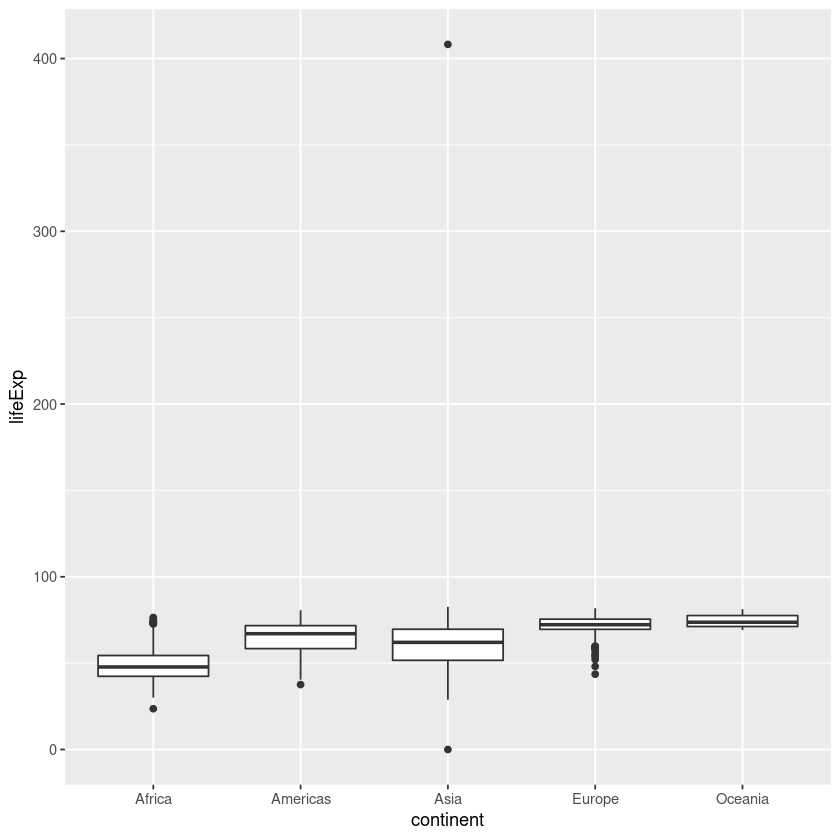

In [87]:
# Une autre technique est d'dentifier les valeurs aberrantes visuellement
gapminder_messy %>%
  ggplot(aes(x = continent, y = lifeExp)) +
  geom_boxplot()

In [88]:
# Identifer les rangées
gapminder_messy %>%
  filter(lifeExp < 20 | lifeExp > 90)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1987,13867957,Asia,408.22,852.3959
Afghanistan,1992,16317921,Asia,0.00,649.3414


In [89]:
# Extraire les valeurs exactes
valeurs_aberrantes <- gapminder_messy %>%
  filter(lifeExp < 20 | lifeExp > 90) %>%
  pull(lifeExp)
valeurs_aberrantes

# Corriger les valeurs
gapminder_messy <- gapminder_messy %>%
  mutate(lifeExp = replace(lifeExp, lifeExp == 0, NA),
         lifeExp = replace(lifeExp, lifeExp == valeurs_aberrantes[1], valeurs_aberrantes[1]/10))

# Les erreurs ont été corrigées
head(gapminder_messy, 10)

[1] 408.22   0.00

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,NA,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134
Afghanistan,1982,12881816,Asia,39.854,978.0114
Afghanistan,1987,13867957,Asia,40.822,852.3959
Afghanistan,1992,16317921,Asia,NA,649.3414


### Défi 4

Reprenez votre jeu de données `gapminder_defi` du Défi 3. En quelle année l'**espérance de vie** a-t-elle été la plus élevée au **Canada**? Quel était le **nombre d'habitant** cette même année?

In [90]:
# Voici les commandes pour le reproduire au besoin
url_defi <- "https://raw.githubusercontent.com/gabrieldansereau/RanDonnees2022-atelier-manipulation-R/main/gapminder_messy_challenges.csv"
gapminder_defi_clean <- read_csv(url_defi) %>%
  slice(-1) %>%
  rename(year = ...2,
         lifeExp = `life _Exp`) %>%
  mutate(lifeExp = as.numeric(lifeExp))

Warning message:
“Missing column names filled in: 'X2' [2]”

── Column specification ────────────────────────────────────────────────────────
cols(
  country = col_character(),
  X2 = col_double(),
  pop = col_double(),
  continent = col_character(),
  `life _Exp` = col_character(),
  gdpPercap = col_double()
)




ERROR: Error: Can't rename columns that don't exist.
[31m✖[39m Column `...2` doesn't exist.


country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Canada,1952,14785584,Americas,NA,11367.16
Canada,1957,17010154,Americas,69.960,12489.95
Canada,1962,18985849,Americas,71.300,13462.49
Canada,1967,20819767,Americas,72.130,16076.59
Canada,1972,22284500,Americas,72.880,18970.57
Canada,1977,23796400,Americas,74.210,22090.88
Canada,1982,25201900,Americas,75.760,22898.79
Canada,1987,26549700,Americas,76.860,NA
Canada,1992,28523502,Americas,77.950,26342.88


year,n
<dbl>,<int>
1952,142
1957,142
1962,142
1967,142
1972,142
1977,142
1982,142
1987,142
1992,142


Warning message:
“Removed 1 rows containing missing values (geom_point).”


2007 
33390141

[1] 1

[1] "2007"

[1] 33390141

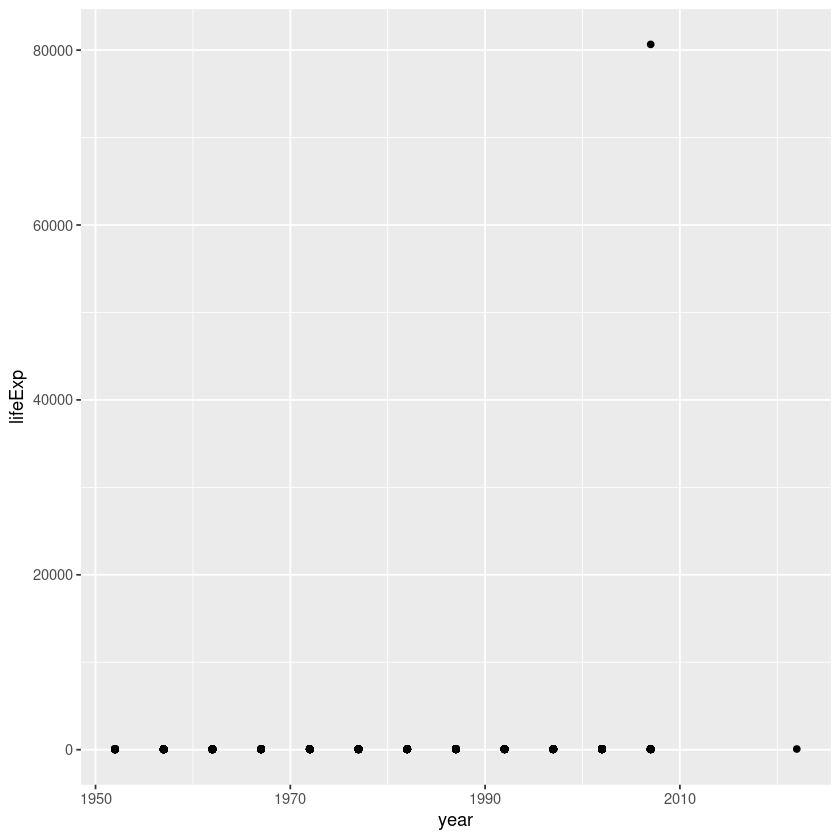

In [91]:
## Solution
# Regardons d'abord les données pour le Canada seulement
gapminder_defi_clean %>%
  filter(country == "Canada")

# Y'a-t-il des doublons ou des erreurs au niveau des années?
gapminder_defi_clean %>%
  count(year)

# Y'a-t-il des valeurs aberrantes pour l'espérance de vie?
gapminder_defi_clean %>%
  ggplot(aes(x = year, y = lifeExp)) +
  geom_point()

# Corrigeons les erreurs
gapminder_canada <- gapminder_defi_clean %>%
  filter(country == "Canada") %>%
  mutate(lifeExp = replace(lifeExp, lifeExp == 80653, 80.653)) %>%
  distinct()

# Vérifions maintenant en quelle année l'espérance de vie était la plus élevée
# et extrayons la population cette même année
reponse <- gapminder_canada %>%
  filter(lifeExp == max(lifeExp, na.rm = TRUE)) %>%
  pull(pop, year)
reponse

# À noter qu'il s'agit ici d'un vector nommé (named vector) qui ne contient
# qu'une seule valeur.
length(reponse) # 1 seule valeur
names(reponse) # l'annee est le nom
reponse[[1]] # la population est la valeur


# 3.0 Réorganisation du jeu de données

Les jeux de données sont souvent organisés dans un format pratique pour la saisie des données. Or, il arrive que ce format ne convienne pas l'analyse et complique certaines tâches. Il est donc parfois nécessaire d'effectuer des opérations en _R_ pour réorganiser la structure des données, sans toutefois en perdre ou risquer de faire des erreurs à la main.

### 3.1 Pivoter du format large au format long avec `pivot_longer()`

Deux types d'organisation des jeux de données sont importants pour l'analyse: le format `long` et le format `large`. Le format `long` est plus pratique pour l'analyse à l'aide d'un langage de programmation comme R, alors que le format `large` est souvent plus instinctif pour la saisie de données. La figure suivante produite par Software Carpentry illustre cette différence:

<p align="center">
  <img align = "center" src="https://swcarpentry.github.io/r-novice-gapminder/fig/14-tidyr-fig1.png" heigth="50%"
       title = "Format large vs long">
</p>

Le jeu de données `gapminder` est dans un format intermédiaire, mais ressemble plus au format long.

Les prochaines étapes montreront comme passer d'un format à l'autre. Cette étape peut également s'avérer pratique lors de certaines analyses ou manipulations de données.

Nous utiliserons pour commencer une nouvelle version large de `gapminder` (déjà nettoyée comme dans la première partie). Le but sera de partir de la version large et d'arriver à une version identique au jeu de données initial.

In [ ]:
# Rappel du jeu de données long
head(gapminder)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [ ]:
# Charger le jeu de données au format large
gapminder_wide_url <- "https://raw.githubusercontent.com/swcarpentry/r-novice-gapminder/gh-pages/_episodes_rmd/data/gapminder_wide.csv"
gap_wide <- read_csv(gapminder_wide_url)
head(gap_wide)
glimpse(gap_wide)

Rows: 142 Columns: 38

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): continent, country
dbl (36): gdpPercap_1952, gdpPercap_1957, gdpPercap_1962, gdpPercap_1967, gd...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



continent,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,⋯,pop_1962,pop_1967,pop_1972,pop_1977,pop_1982,pop_1987,pop_1992,pop_1997,pop_2002,pop_2007
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,Algeria,2449.0082,3013.9760,2550.8169,3246.9918,4182.6638,4910.4168,5745.1602,5681.3585,⋯,11000948,12760499,14760787,17152804,20033753,23254956,26298373,29072015,31287142,33333216
Africa,Angola,3520.6103,3827.9405,4269.2767,5522.7764,5473.2880,3008.6474,2756.9537,2430.2083,⋯,4826015,5247469,5894858,6162675,7016384,7874230,8735988,9875024,10866106,12420476
Africa,Benin,1062.7522,959.6011,949.4991,1035.8314,1085.7969,1029.1613,1277.8976,1225.8560,⋯,2151895,2427334,2761407,3168267,3641603,4243788,4981671,6066080,7026113,8078314
Africa,Botswana,851.2411,918.2325,983.6540,1214.7093,2263.6111,3214.8578,4551.1421,6205.8839,⋯,512764,553541,619351,781472,970347,1151184,1342614,1536536,1630347,1639131
Africa,Burkina Faso,543.2552,617.1835,722.5120,794.8266,854.7360,743.3870,807.1986,912.0631,⋯,4919632,5127935,5433886,5889574,6634596,7586551,8878303,10352843,12251209,14326203
Africa,Burundi,339.2965,379.5646,355.2032,412.9775,464.0995,556.1033,559.6032,621.8188,⋯,2961915,3330989,3529983,3834415,4580410,5126023,5809236,6121610,7021078,8390505


Rows: 142
Columns: 38
$ continent      <chr> "Africa", "Africa", "Africa", "Africa", "Africa", "Afri…
$ country        <chr> "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso…
$ gdpPercap_1952 <dbl> 2449.0082, 3520.6103, 1062.7522, 851.2411, 543.2552, 33…
$ gdpPercap_1957 <dbl> 3013.9760, 3827.9405, 959.6011, 918.2325, 617.1835, 379…
$ gdpPercap_1962 <dbl> 2550.8169, 4269.2767, 949.4991, 983.6540, 722.5120, 355…
$ gdpPercap_1967 <dbl> 3246.9918, 5522.7764, 1035.8314, 1214.7093, 794.8266, 4…
$ gdpPercap_1972 <dbl> 4182.6638, 5473.2880, 1085.7969, 2263.6111, 854.7360, 4…
$ gdpPercap_1977 <dbl> 4910.4168, 3008.6474, 1029.1613, 3214.8578, 743.3870, 5…
$ gdpPercap_1982 <dbl> 5745.1602, 2756.9537, 1277.8976, 4551.1421, 807.1986, 5…
$ gdpPercap_1987 <dbl> 5681.3585, 2430.2083, 1225.8560, 6205.8839, 912.0631, 6…
$ gdpPercap_1992 <dbl> 5023.2166, 2627.8457, 1191.2077, 7954.1116, 931.7528, 6…
$ gdpPercap_1997 <dbl> 4797.2951, 2277.1409, 1232.9753, 8647.1423, 946.2950, 4…
$ gdpPercap_2002 <

In [ ]:
# Commençons par un seul type de colonne au format long
gap_wide_pop <- gap_wide %>%
  select(-starts_with("gdp"), -starts_with("life"))
glimpse(gap_wide_pop)

Rows: 142
Columns: 14
$ continent <chr> "Africa", "Africa", "Africa", "Africa", "Africa", "Africa", …
$ country   <chr> "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "B…
$ pop_1952  <dbl> 9279525, 4232095, 1738315, 442308, 4469979, 2445618, 5009067…
$ pop_1957  <dbl> 10270856, 4561361, 1925173, 474639, 4713416, 2667518, 535992…
$ pop_1962  <dbl> 11000948, 4826015, 2151895, 512764, 4919632, 2961915, 579363…
$ pop_1967  <dbl> 12760499, 5247469, 2427334, 553541, 5127935, 3330989, 633550…
$ pop_1972  <dbl> 14760787, 5894858, 2761407, 619351, 5433886, 3529983, 702102…
$ pop_1977  <dbl> 17152804, 6162675, 3168267, 781472, 5889574, 3834415, 795986…
$ pop_1982  <dbl> 20033753, 7016384, 3641603, 970347, 6634596, 4580410, 925083…
$ pop_1987  <dbl> 23254956, 7874230, 4243788, 1151184, 7586551, 5126023, 10780…
$ pop_1992  <dbl> 26298373, 8735988, 4981671, 1342614, 8878303, 5809236, 12467…
$ pop_1997  <dbl> 29072015, 9875024, 6066080, 1536536, 10352843, 6121610, 1419…
$ pop_2002  <dbl> 

In [ ]:
# Pivoter toutes les colonnes pop
gap_wide_pop %>%
  pivot_longer(cols = c(starts_with("pop")),
               names_to = "type_year",
               values_to = "pop") %>%
  head()

continent,country,type_year,pop
<chr>,<chr>,<chr>,<dbl>
Africa,Algeria,pop_1952,9279525
Africa,Algeria,pop_1957,10270856
Africa,Algeria,pop_1962,11000948
Africa,Algeria,pop_1967,12760499
Africa,Algeria,pop_1972,14760787
Africa,Algeria,pop_1977,17152804


In [ ]:
# Pivoter, puis séparer les colonnes
gap_wide_pop %>%
  pivot_longer(cols = c(starts_with("pop")),
               names_to = "type_year",
               values_to = "pop") %>%
  separate(type_year, into = c("type", "year"), sep = "_") %>%
  head()

continent,country,type,year,pop
<chr>,<chr>,<chr>,<chr>,<dbl>
Africa,Algeria,pop,1952,9279525
Africa,Algeria,pop,1957,10270856
Africa,Algeria,pop,1962,11000948
Africa,Algeria,pop,1967,12760499
Africa,Algeria,pop,1972,14760787
Africa,Algeria,pop,1977,17152804


In [ ]:
# Répéter avec le jeux de données large complet
gap_long <- gap_wide %>%
  pivot_longer(cols = c(starts_with("pop"), starts_with("life"), starts_with("gdp")),
               names_to = "type_year",
               values_to = "value") %>%
  separate(type_year, into = c("type", "year"))
tail(gap_long)

continent,country,type,year,value
<chr>,<chr>,<chr>,<chr>,<dbl>
Oceania,New Zealand,gdpPercap,1982,17632.41
Oceania,New Zealand,gdpPercap,1987,19007.19
Oceania,New Zealand,gdpPercap,1992,18363.32
Oceania,New Zealand,gdpPercap,1997,21050.41
Oceania,New Zealand,gdpPercap,2002,23189.80
Oceania,New Zealand,gdpPercap,2007,25185.01


In [ ]:
# Convertir les années au format numérique et mettre en ordre comme le jeu de données initial
gap_long <- gap_long %>%
  mutate(year = as.integer(year)) %>%
  arrange(country, year)
head(gap_long)

continent,country,type,year,value
<chr>,<chr>,<chr>,<int>,<dbl>
Asia,Afghanistan,pop,1952,8425333.0000
Asia,Afghanistan,lifeExp,1952,28.8010
Asia,Afghanistan,gdpPercap,1952,779.4453
Asia,Afghanistan,pop,1957,9240934.0000
Asia,Afghanistan,lifeExp,1957,30.3320
Asia,Afghanistan,gdpPercap,1957,820.8530


In [ ]:
# Comparer avec le jeu de données initial
head(gapminder)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


### 3.2 Pivoter vers un format plus large avec `pivot_wider()`

In [ ]:
# Pivoter au format large
gap_normal <- gap_long %>%
  pivot_wider(names_from = type,
              values_from = value)
head(gap_normal)

continent,country,year,pop,lifeExp,gdpPercap
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
Asia,Afghanistan,1952,8425333,28.801,779.4453
Asia,Afghanistan,1957,9240934,30.332,820.8530
Asia,Afghanistan,1962,10267083,31.997,853.1007
Asia,Afghanistan,1967,11537966,34.020,836.1971
Asia,Afghanistan,1972,13079460,36.088,739.9811
Asia,Afghanistan,1977,14880372,38.438,786.1134


In [ ]:
# Comparaison avec le jeu de données initial
dim(gap_normal)
dim(gapminder)

[1] 1704    6

[1] 1704    6

In [ ]:
# Mettre les colonnes dans le même ordre
gap_normal <- gap_normal %>%
  select(names(gapminder)) %>%
  arrange(country, year)
head(gap_normal)

country,year,pop,continent,lifeExp,gdpPercap
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134


In [ ]:
# Vérifier si l'ordre correspond
names(gap_normal)
names(gapminder)

[1] "country"   "year"      "pop"       "continent" "lifeExp"   "gdpPercap"

[1] "country"   "year"      "pop"       "continent" "lifeExp"   "gdpPercap"

In [ ]:
# Est-ce que les jeux de données sont identiques?
all(gap_normal == gapminder)

[1] TRUE

# 4.0 Ressources supplémentaires

Cet atelier a été développé à partir des ateliers [`dplyr`](https://swcarpentry.github.io/r-novice-gapminder/13-dplyr/index.html) et [`tidyr`](https://swcarpentry.github.io/r-novice-gapminder/14-tidyr/index.html) de Software Carpentry, qui sont sous licence [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). Le contenu a été adapté pour la présentation lors du défi Ran.Données 2022.

Citation originale: Naupaka Zimmerman, Greg Wilson, Raniere Silva, Scott Ritchie, François Michonneau, Jeffrey Oliver, … Yuka Takemon. (2019, July). swcarpentry/r-novice-gapminder: Software Carpentry: R for Reproducible Scientific Analysis, June 2019 (Version v2019.06.1). Zenodo. http://doi.org/10.5281/zenodo.3265164

## Liens pertinents

- [Cheat sheet dplyr](https://raw.githubusercontent.com/rstudio/cheatsheets/main/data-transformation.pdf)
- [Cheat sheet tidyr](https://raw.githubusercontent.com/rstudio/cheatsheets/main/tidyr.pdf)
- [Cheat sheet en français (pas à jour)](https://raw.githubusercontent.com/rstudio/cheatsheets/main/translations/french/data-wrangling_fr.pdf)
- [Toutes les cheat sheets de RStudio](https://www.rstudio.com/resources/cheatsheets/)
- [R for Data Science](https://r4ds.had.co.nz/)
- [Atelier du Centre sur la science de la biodiversité du Québec](https://r.qcbs.ca/workshop02/book-fr/manipuler-ses-donn%C3%A9es-avec-tidyr-dyplr-maggritr.html) (en français)
- [Introduction au tidyverse par Julien Barnier](https://juba.github.io/tidyverse/index.html)  (en français)